In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading csv file
df = pd.read_csv(r"C:\Users\HP\Downloads\USA_ACCIDENTS.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Start_Time,Start_Lat,Start_Lng,City,State,Temperature(F)
0,0,A-1,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,36.9
1,1,A-2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,37.9
2,2,A-3,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,OH,36.0
3,3,A-4,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,OH,35.1
4,4,A-5,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,OH,36.0


In [4]:
# transform data type
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')
# how many accidents in different years
df['Year'] = df['Start_Time'].dt.year
# Drop rows where Year is 2023
df = df[df['Year'] != 2023]

In [5]:
# detect null value, sum and order them in asc
df.isnull().sum().sort_values(ascending=False)

Temperature(F)    157679
City                 251
Unnamed: 0             0
ID                     0
Start_Time             0
Start_Lat              0
Start_Lng              0
State                  0
Year                   0
dtype: int64

In [7]:
# printout all states
df['State'].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

Coastal_or_Inland_Regions
Coastal_Regions    4580470
Inland_Regions     2736924
Others              164367
Name: Coastal_or_Inland_Regions, dtype: int64


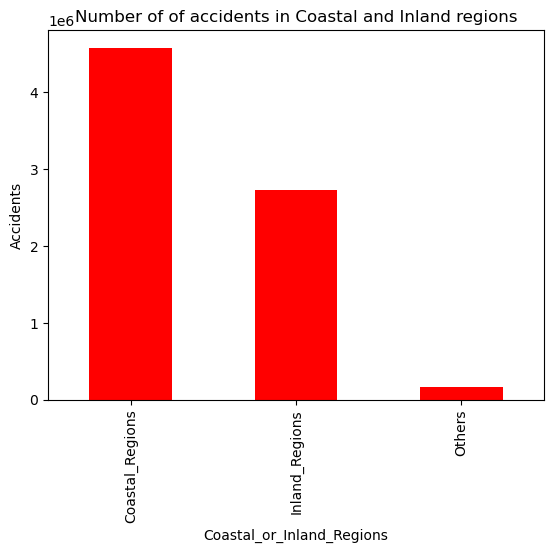

In [8]:
# define Coastal and Inland Regions
Coastal_Regions = ['CA', 'FL', 'GA', 'SC', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'MD', 'VA', 'DC', 'DE', 'AL', 'NC']
Inland_Regions = ['OH', 'WV', 'NE', 'IA', 'IL', 'MO', 'WI', 'IN', 'MI', 'PA', 'KY', 'TX', 'WA', 'OR', 'TN', 'LA', 'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT', 'WY', 'ID', 'ND', 'MT', 'SD']

# Function to classify regions
def classify(state):
    if state in Coastal_Regions:
        return 'Coastal_Regions'
    elif state in Inland_Regions:
        return 'Inland_Regions'
    else:
        return 'Others'
# Create 'Coastal_or_Inland_Regions' column
df['Coastal_or_Inland_Regions'] = df['State'].apply(classify)

# how many accidents in 'Coastal_or_Inland_Regions'
df_Coastal_or_Inland_Regions = df.groupby(['Coastal_or_Inland_Regions'])['Coastal_or_Inland_Regions'].count()
print(df_Coastal_or_Inland_Regions)

#visualise how many accidents in 'Coastal_or_Inland_Regions'
df_Coastal_or_Inland_Regions.plot(kind='bar')
ax = df_Coastal_or_Inland_Regions.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in Coastal and Inland regions")
plt.show()

Location
East      3961037
Middle    1156600
West      2364124
Name: Location, dtype: int64


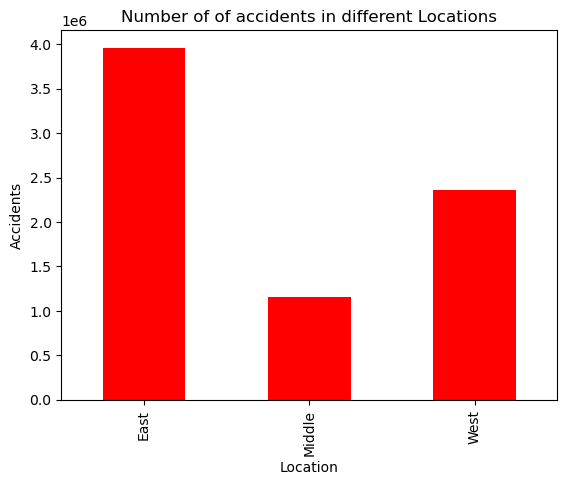

In [9]:
# printout all states
df['State'].unique()
# define west,middle and east states
west_states = ['CA', 'WA', 'OR', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'AZ', 'NM']
middle_states = ['ND', 'SD', 'NE', 'KS', 'OK', 'TX', 'MN', 'IA', 'MO', 'AR', 'LA']
east_states = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'DC', 'WV', 'VA', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'OH', 'IN', 'MI', 'WI', 'IL']

# Function to classify states
def classify_state(state):
    if state in west_states:
        return 'West'
    elif state in middle_states:
        return 'Middle'
    elif state in east_states:
        return 'East'
    else:
        return 'Unknown'
# Create 'location' column
df['Location'] = df['State'].apply(classify_state)

# how many accidents in locations
df_location = df.groupby(['Location'])['Location'].count()
print(df_location)

#visualise how many accidents in locations
df_location.plot(kind='bar')
ax = df_location.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in different Locations")
plt.show()

In [10]:
# how many accidents in states
df3 = df.groupby(['State'])['State'].count().sort_values(ascending=False)
#select top 15
#print(df3.iloc[:15])

#visualise how many accidents in states
#select top 15
#df4 = df3.iloc[:15]
#df4.plot(kind='bar')
#ax = df4.plot(kind='bar',color='red')
#plt.ylabel('Accidents')
#plt.title("Number of of accidents in different states")
# Add exact numbers on top of each bar
#plt.show()



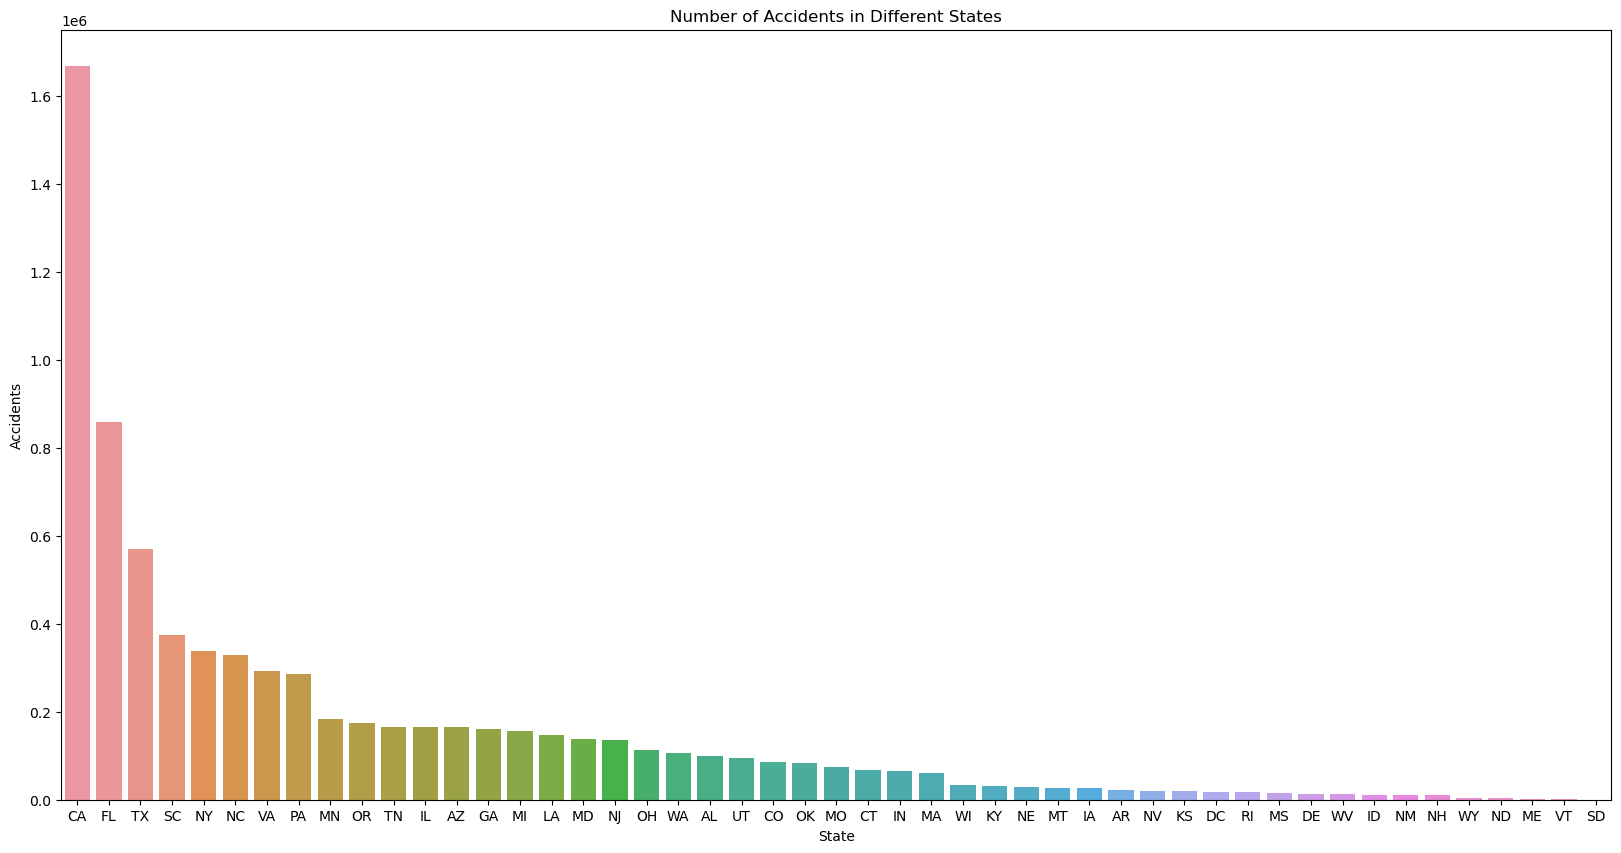

In [11]:

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=df3.index, y=df3)
plt.ylabel('Accidents')
plt.title("Number of Accidents in Different States")

plt.show()

In [12]:
# how many accidents in cities
df5 = df.groupby(['City'])['City'].count().sort_values(ascending=False)
#select top 10
df_first_20 = df5.iloc[:20]

#visualise how many accidents in cities
#select top 10
#df6 = df5.iloc[:10]
#df6.plot(kind='bar',color='red')
#plt.ylabel('Accidents')
#plt.title("Number of of accidents in different cities")
#plt.show()


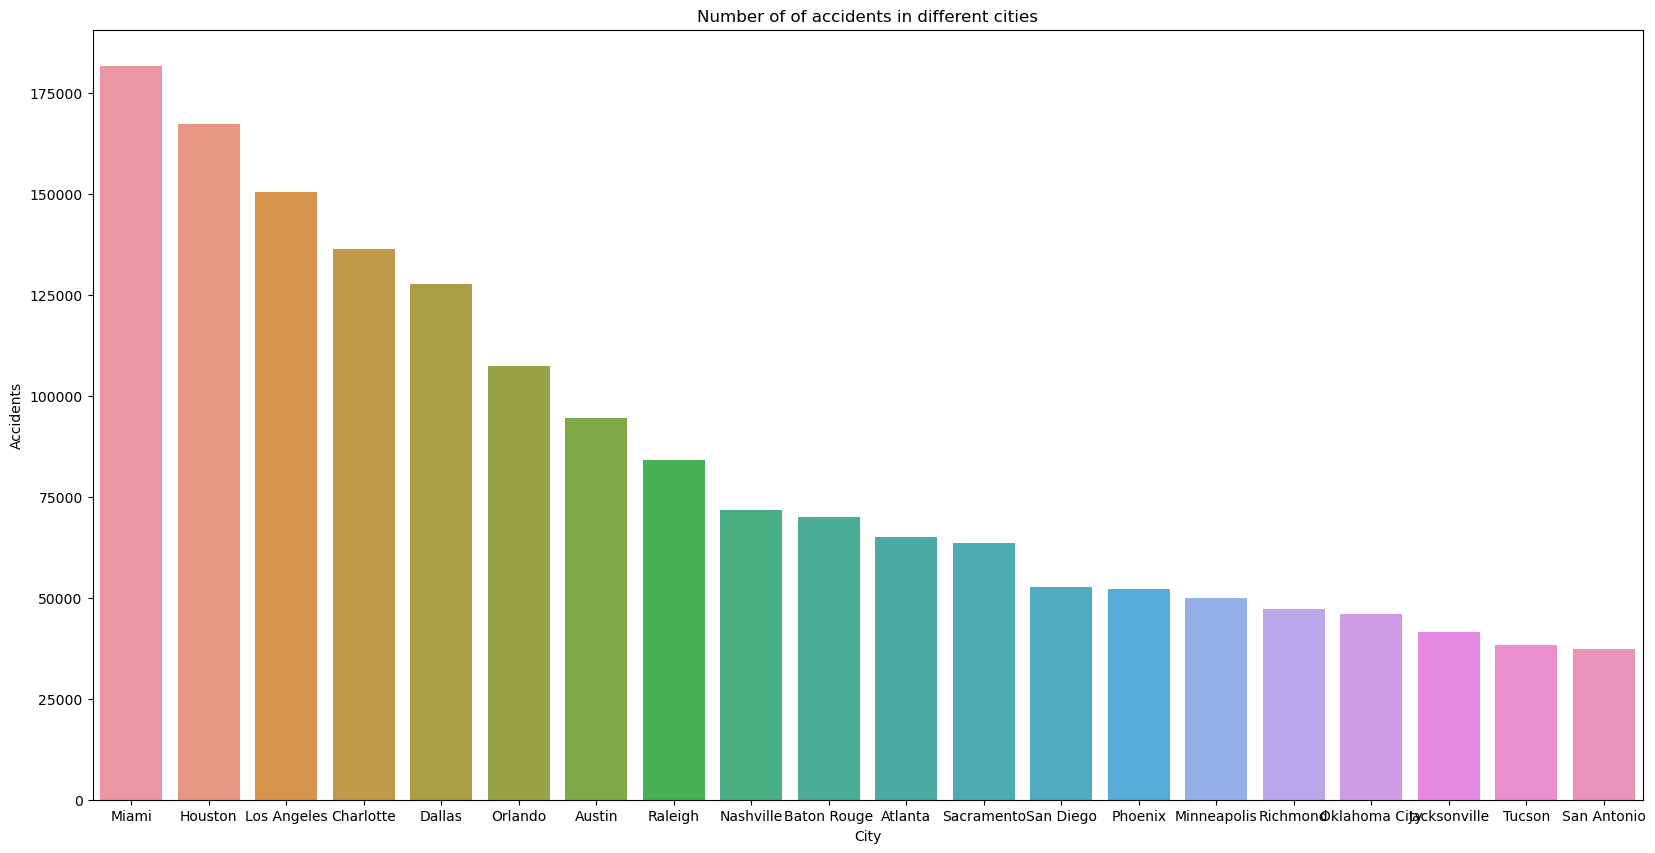

In [13]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=df_first_20.index, y=df_first_20)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different cities")

plt.show()

Year
2016     410821
2017     718093
2018     893426
2019     954303
2020    1178913
2021    1563753
2022    1762452
Name: Year, dtype: int64


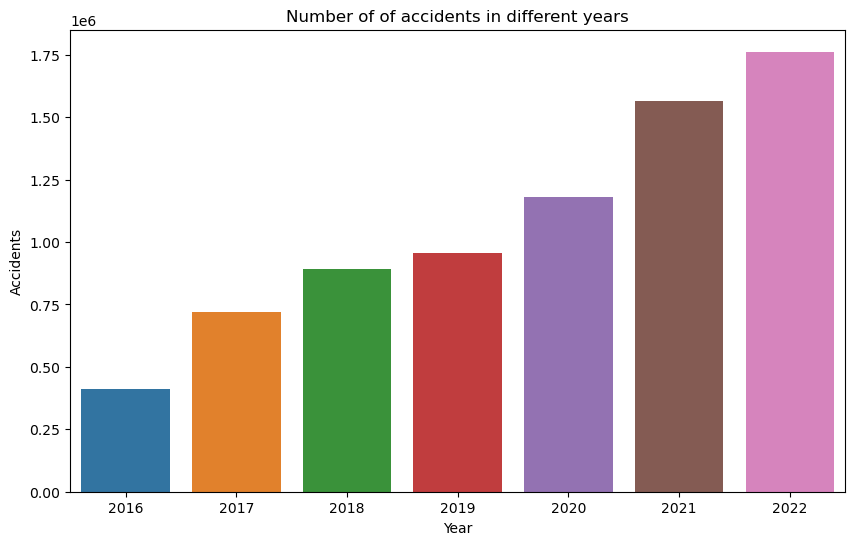

Year
2016      NaN
2017    74.79
2018    24.42
2019     6.81
2020    23.54
2021    32.64
2022    12.71
Name: Year, dtype: float64


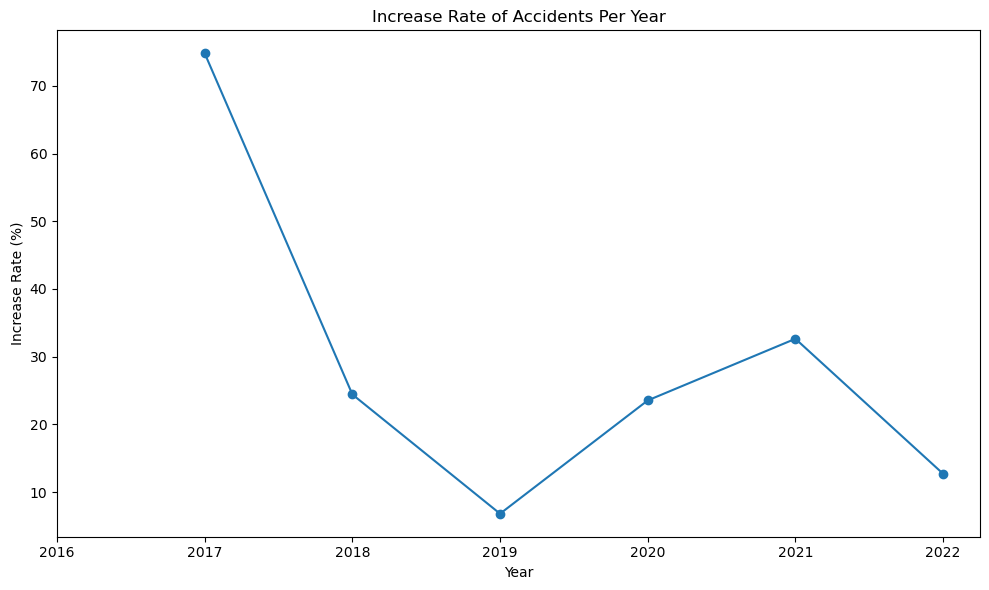

29.15

In [14]:
# transform data type
# df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Convert 'Start_Time' to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the year
df['Year'] = df['Start_Time'].dt.year

# Group by year and count the number of accidents
df7 = df.groupby(['Year'])['Year'].count().sort_values(ascending=True)
print(df7)


#visualise how many accidents in years
#select top 10 in df7
#df8=df7.iloc[:10]
#df8.plot(kind='bar',color='red')
#plt.ylabel('Accidents')
#plt.title("Number of of accidents in different years")
#plt.show()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df7.index, y=df7)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different years")
plt.show()



# Calculate the increase rate for each year
df_increase_rate = df7.pct_change() * 100
# Round increase rate values to two decimal places
df_increase_rate = df_increase_rate.round(2)
print(df_increase_rate)

# Visualize increase rate by line chart
plt.figure(figsize=(10, 6))
plt.plot(df_increase_rate.index, df_increase_rate.values, marker='o')
plt.title('Increase Rate of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Increase Rate (%)')
plt.grid(False)
plt.xticks(df_increase_rate.index)
plt.tight_layout()
plt.show()

# Calculate the average increase yearly
average_increase = df_increase_rate.mean()
average_increase = average_increase.round(2)
average_increase


In [15]:
# Use funtion to automate caulating variation by year and visualisation
def plot_state_variation(data, year1, year2):
    # Filter data for specific years
    df_year1 = data[data['Year'] == year1]
    df_year2 = data[data['Year'] == year2]

    # Group and count for the given years
    df_year1_state = df_year1.groupby('State')['ID'].count().reset_index(name=f'Count-{year1}')
    df_year2_state = df_year2.groupby('State')['ID'].count().reset_index(name=f'Count-{year2}')

    # Merge dataframes
    new_df_both = pd.merge(df_year2_state, df_year1_state, on='State', how='inner')

    # Calculate variation
    new_df_both['Variation'] = new_df_both[f'Count-{year2}'] - new_df_both[f'Count-{year1}']

    # Sort by variation
    new_df_both = new_df_both.sort_values(by='Variation', ascending=False)

    # Set the style of the plot
    # sns.set(style="whitegrid")

    # Create a bar plot using Seaborn
    plt.figure(figsize=(20, 10))
    sns.barplot(x='State', y='Variation', data=new_df_both)

    # Add labels and title
    plt.xlabel('State')
    plt.ylabel('Variation')
    plt.title(f'Variation by State from {year1} to {year2}')

    # Display the plot
    plt.show()



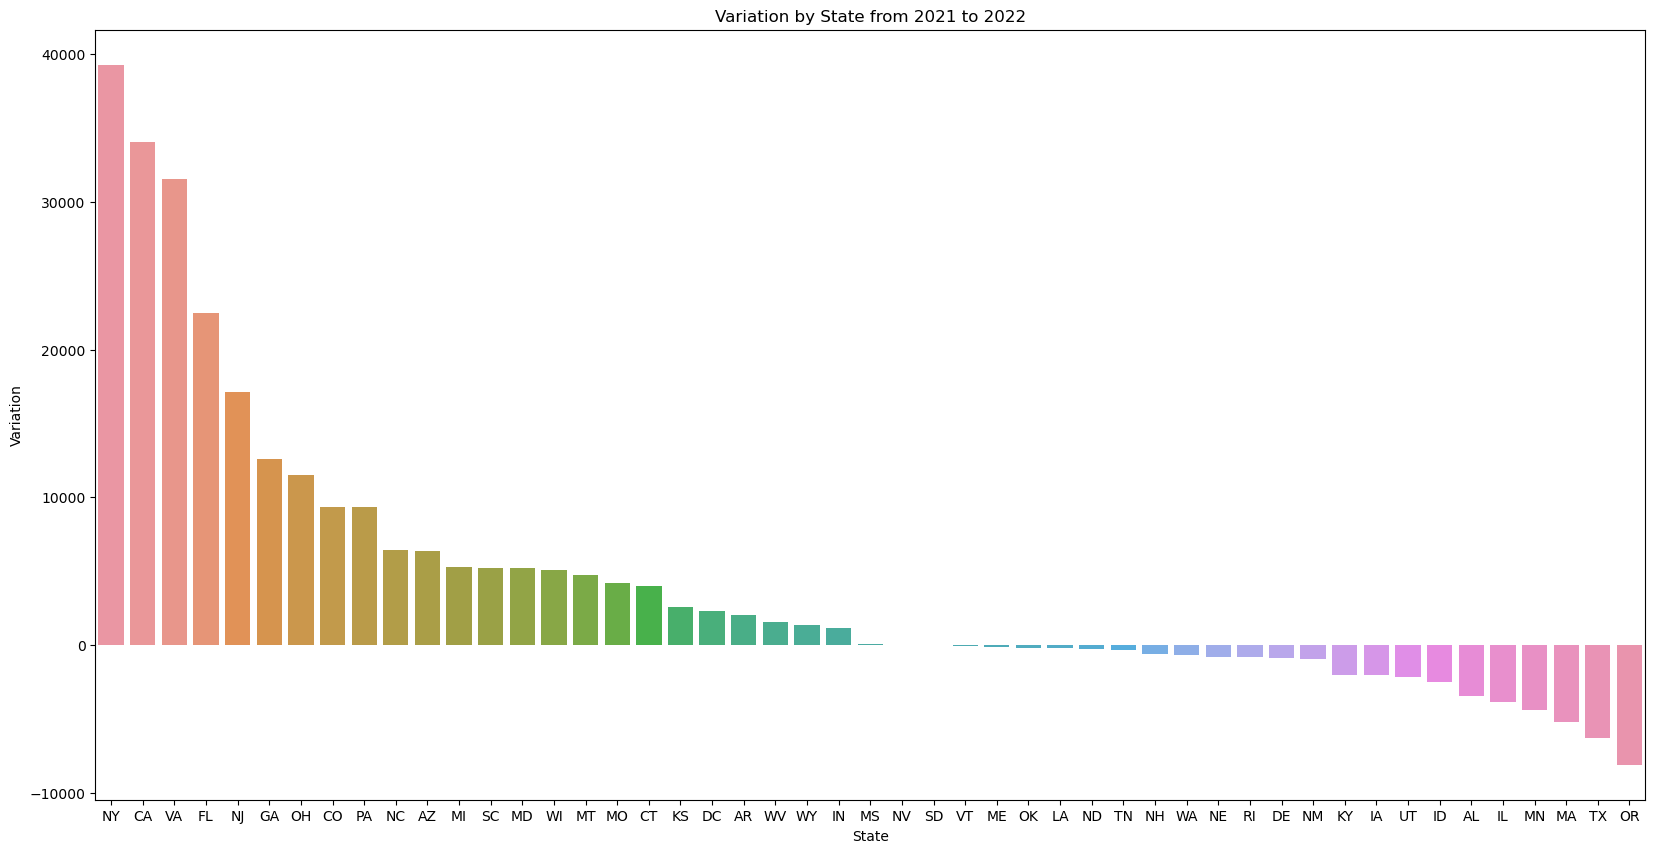

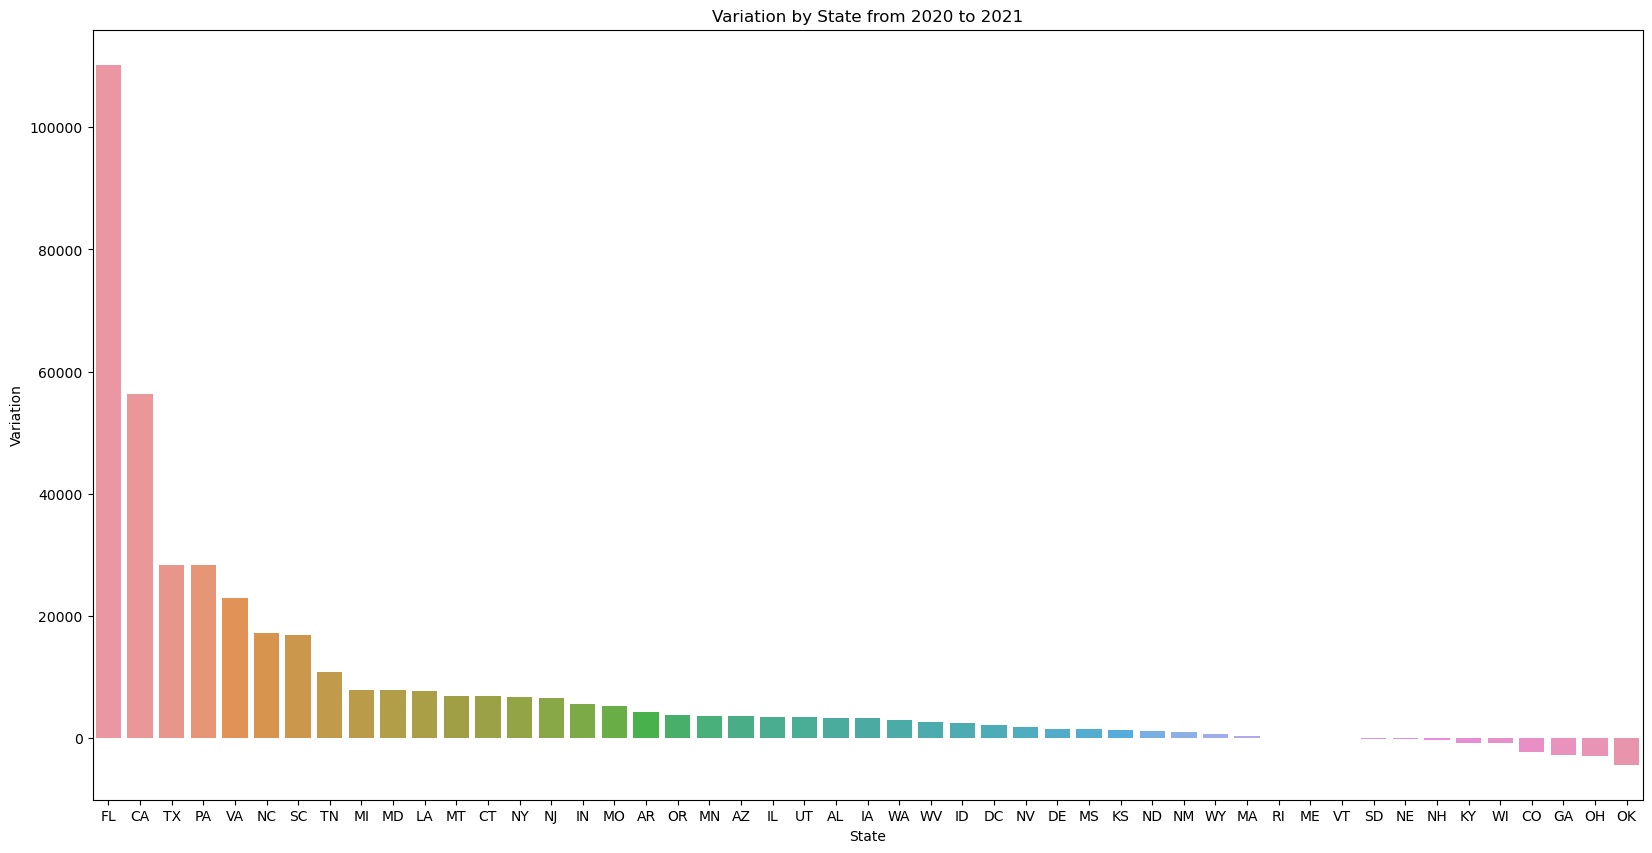

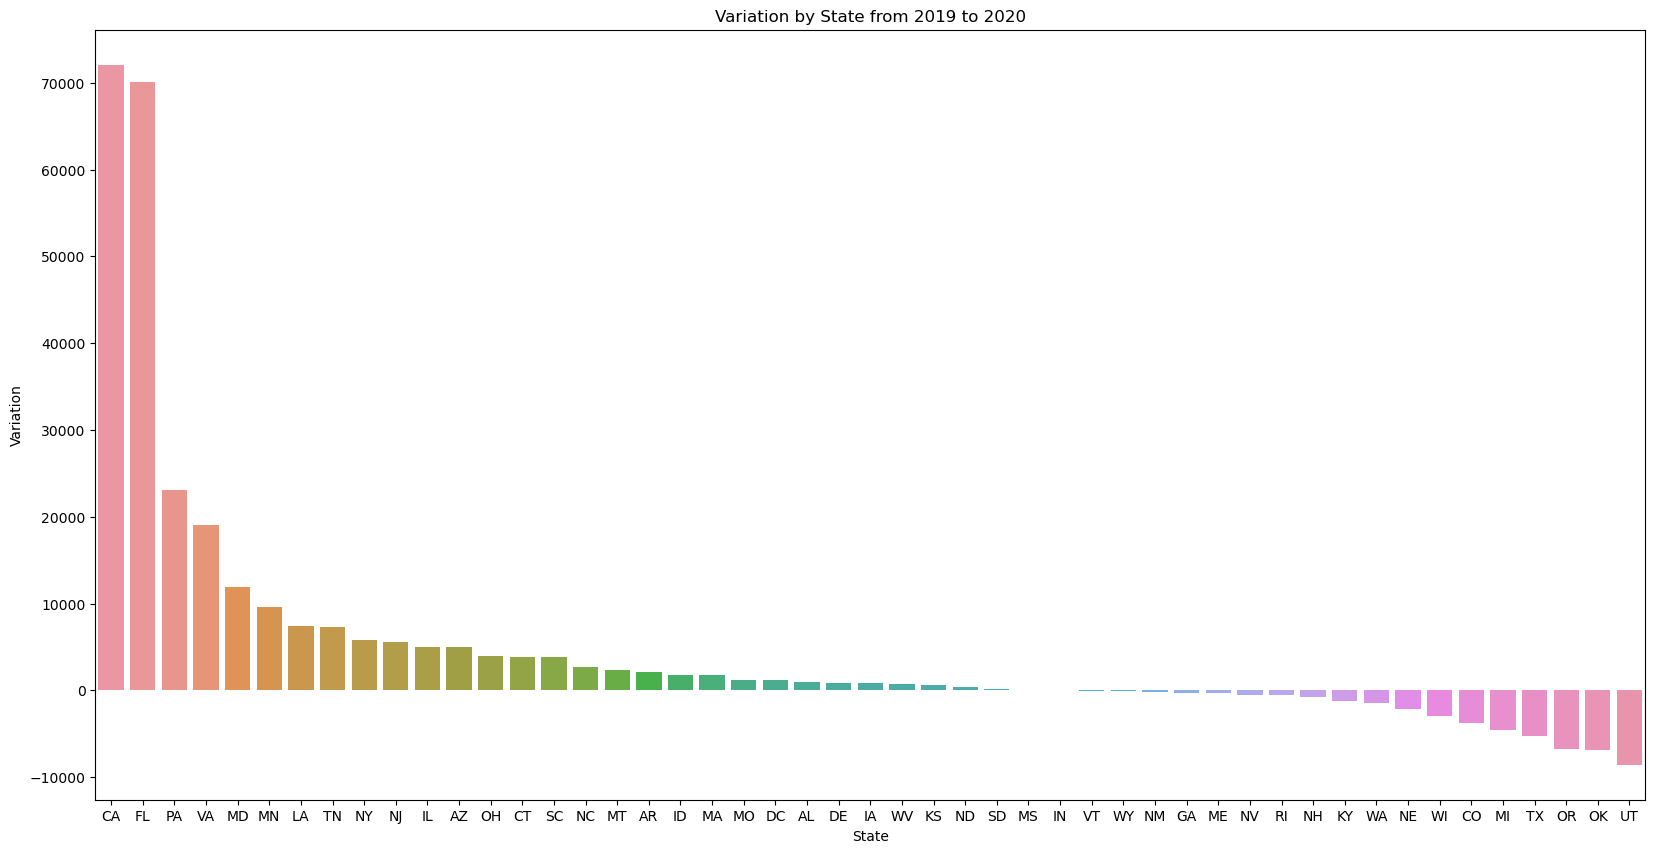

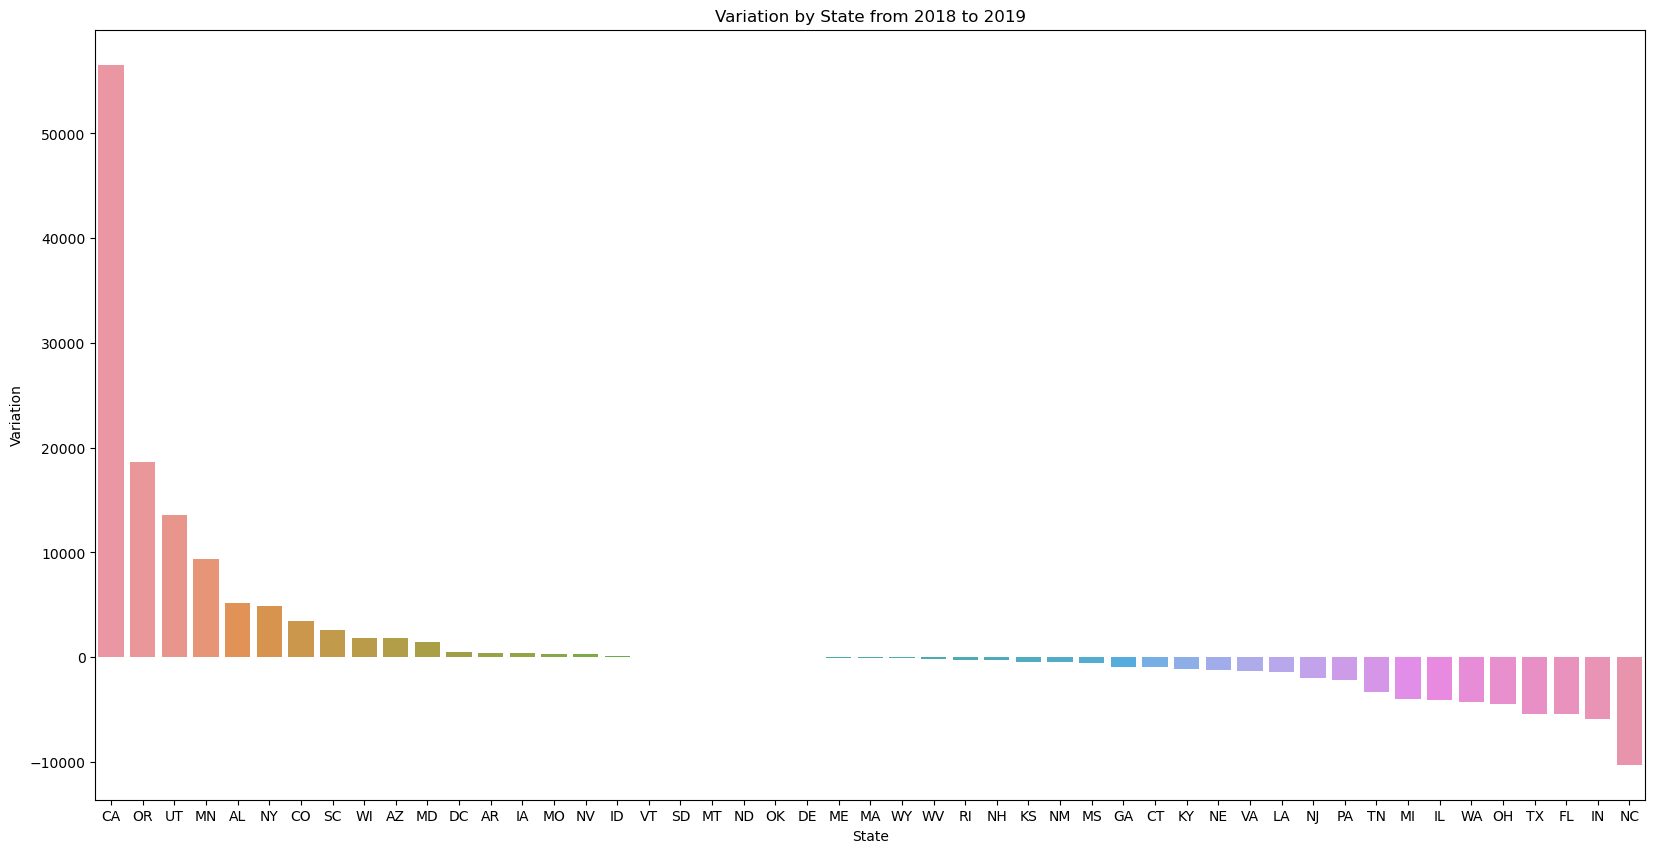

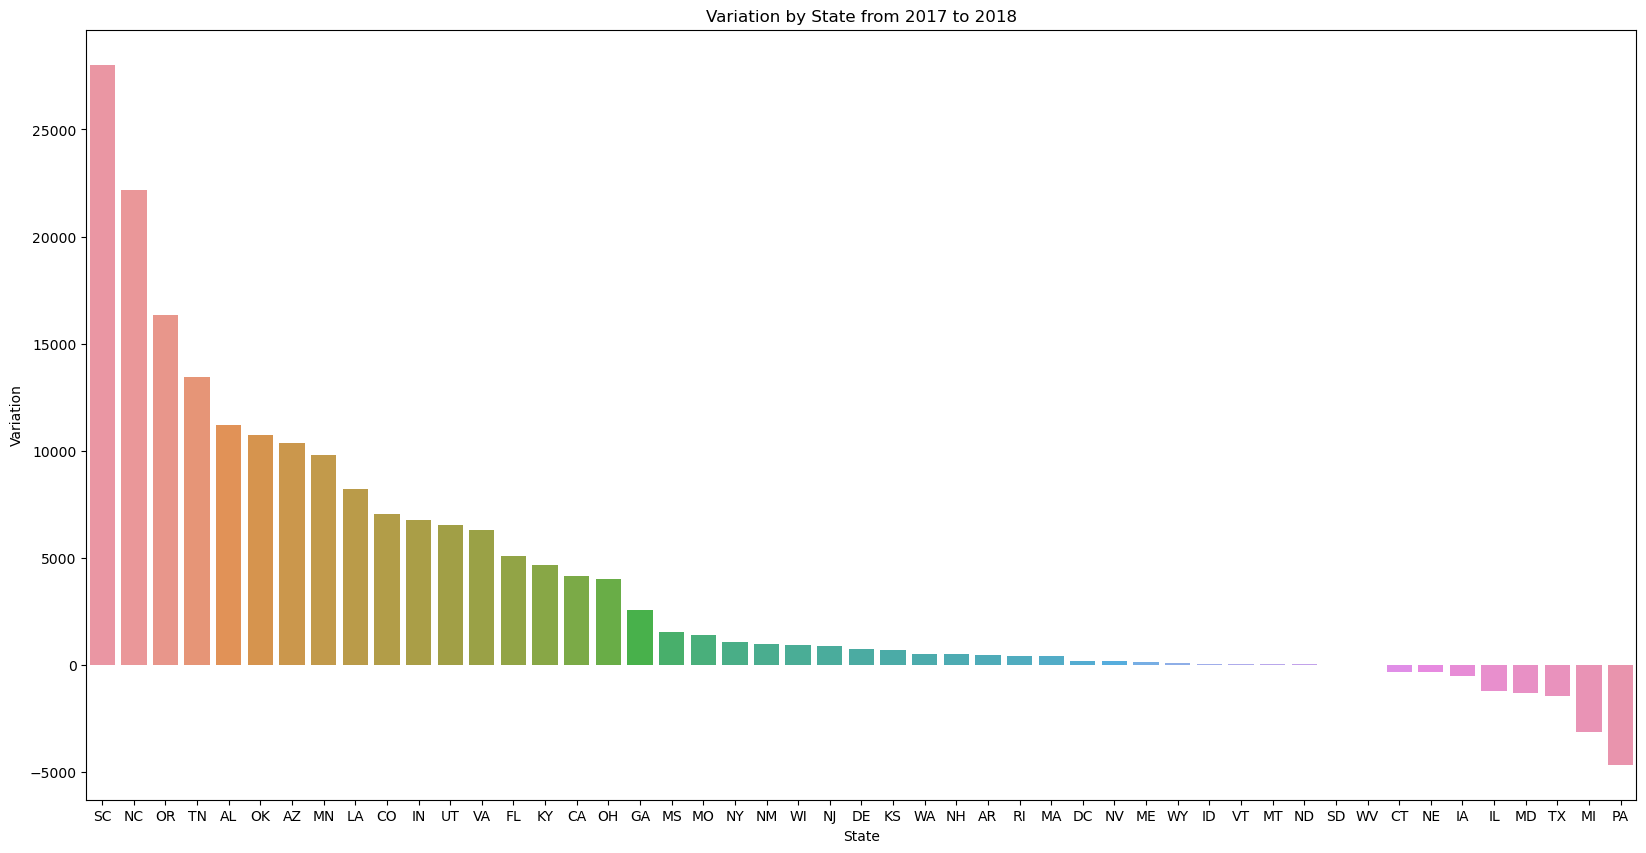

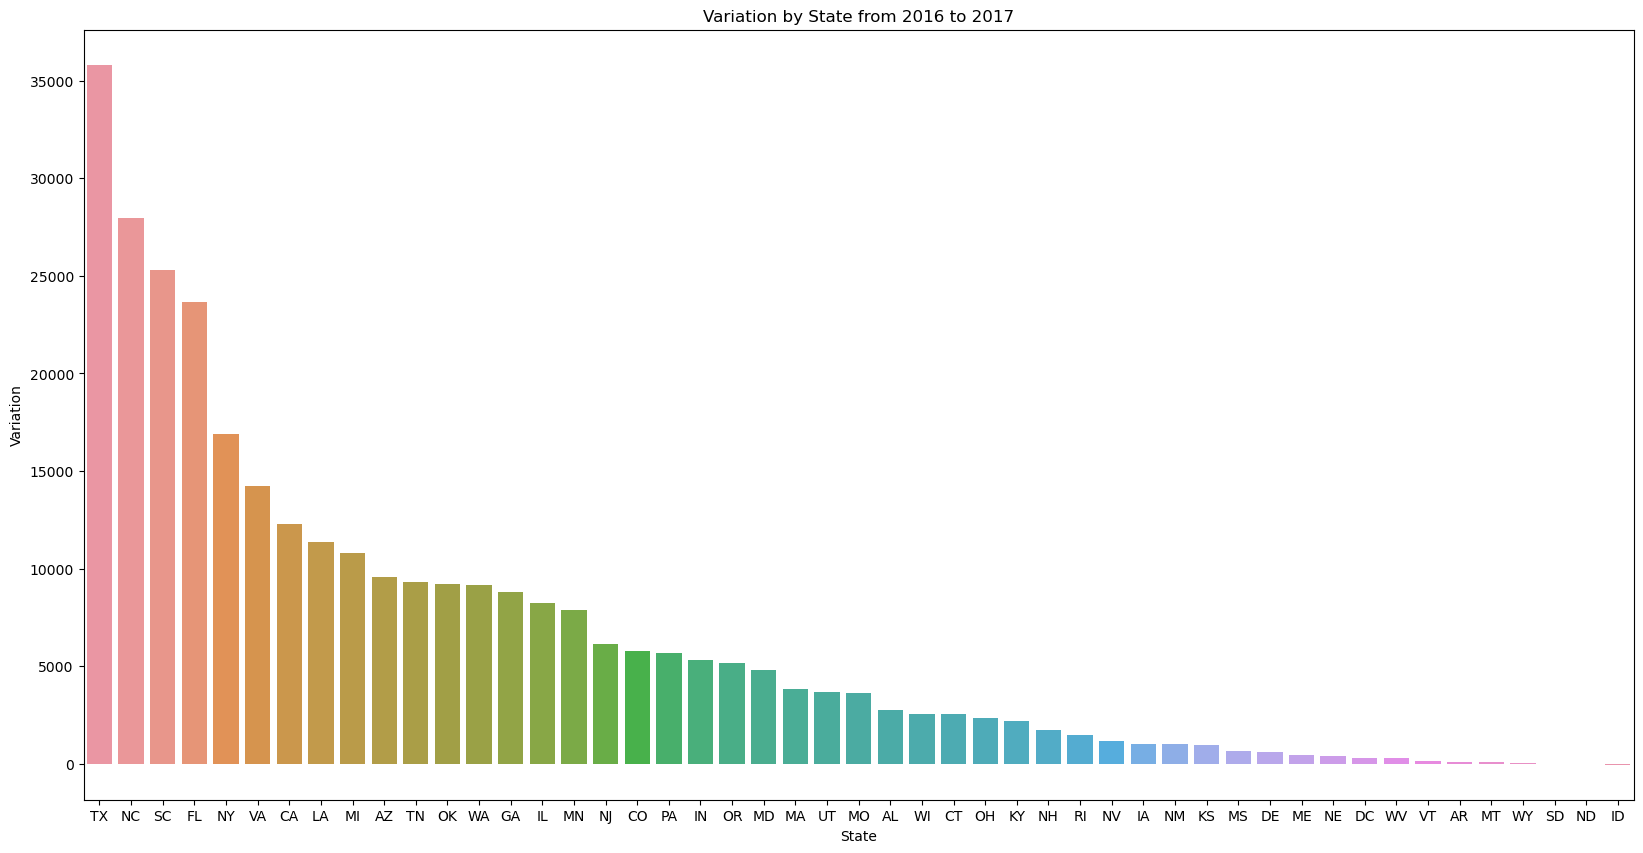

In [16]:
plot_state_variation(df, 2021, 2022)
plot_state_variation(df, 2020, 2021)
plot_state_variation(df, 2019, 2020)
plot_state_variation(df, 2018, 2019)
plot_state_variation(df, 2017, 2018)
plot_state_variation(df, 2016, 2017)

In [17]:
# how many accidents in different months
df['Month'] = df['Start_Time'].dt.month
df9 = df.groupby(['Month'])['Month'].count().sort_values(ascending=False)
print(df9)

Month
12    847343
11    760165
10    675130
9     651381
2     603452
8     599666
1     591032
4     587300
6     571373
5     558176
3     524408
7     512335
Name: Month, dtype: int64


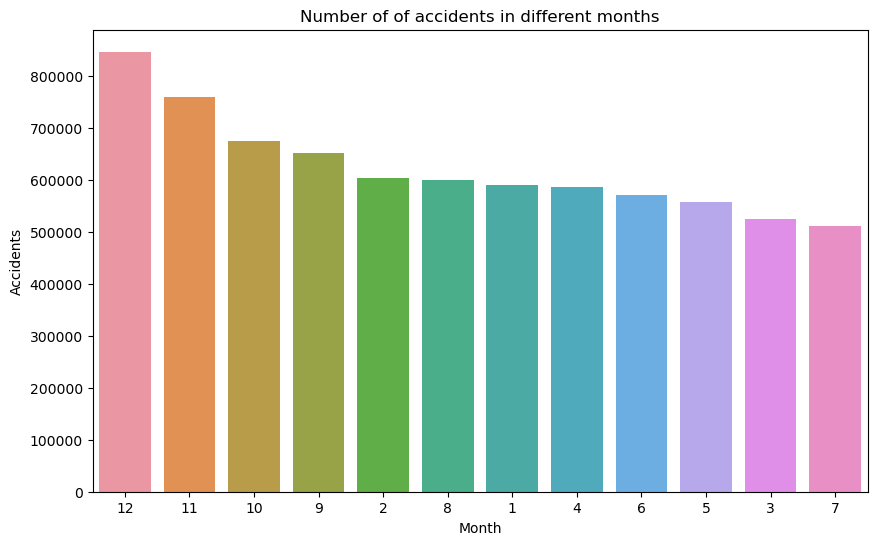

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


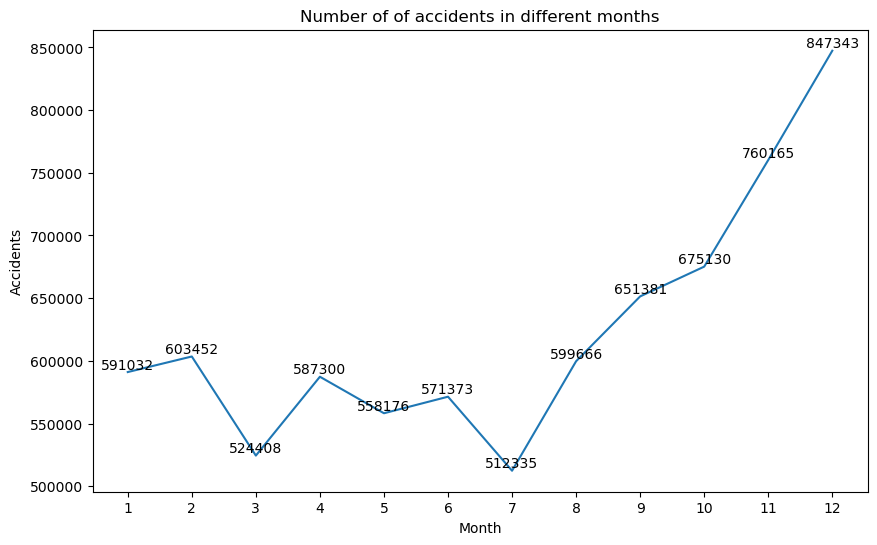

In [18]:
plt.figure(figsize=(10, 6))
# Use order to sort df9.index in sns.barplot
ax = sns.barplot(x=df9.index, y=df9.values, order=df9.index)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different months")
plt.show()

plt.figure(figsize=(10, 6))
# Use order to sort df9.index in sns.barplot
ax = sns.lineplot(x=df9.index, y=df9.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different months")
# Set x-axis ticks to show all months
plt.xticks(df9.index)

# Show data points with exact values
for x, y in zip(df9.index, df9.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

In [19]:
# Convert 'Start_Time' to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the weekday
df['Weekday'] = df['Start_Time'].dt.weekday

# Group by weekday and count the number of accidents
df11 = df.groupby(['Weekday'])['Weekday'].count().sort_values(ascending=False)
print(df11)


Weekday
4    1326626
3    1278055
2    1272842
1    1249508
0    1174058
5     645655
6     535017
Name: Weekday, dtype: int64


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


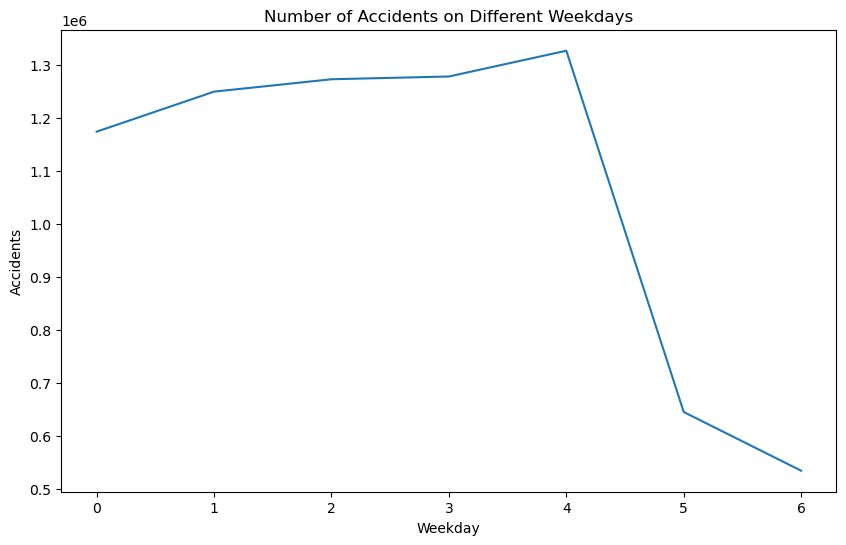

In [20]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=df11.index, y=df11.values)
plt.ylabel('Accidents')
plt.xlabel('Weekday')
plt.title("Number of Accidents on Different Weekdays")
plt.show()

In [21]:
# how many accidents in different hours
# Convert 'Start_Time' to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the hour
df['Hours'] = df['Start_Time'].dt.hour

# Group by hour and count the number of accidents
df13 = df.groupby(['Hours'])['Hours'].count()
print(df13)

#visualise how many accidents in hours
#select top 24 in df13
#df14=df13.iloc[:24]
#df14.plot(kind='bar',color='red')
#plt.ylabel('Accidents')
#plt.title("Number of of accident in different hours during the day")
#plt.show()

Hours
0     107770
1      93326
2      89573
3      80532
4     156094
5     221061
6     392588
7     570282
8     562356
9     351785
10    332821
11    344521
12    343332
13    383342
14    433033
15    507572
16    564017
17    559057
18    418223
19    285436
20    217469
21    184426
22    161682
23    121463
Name: Hours, dtype: int64


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


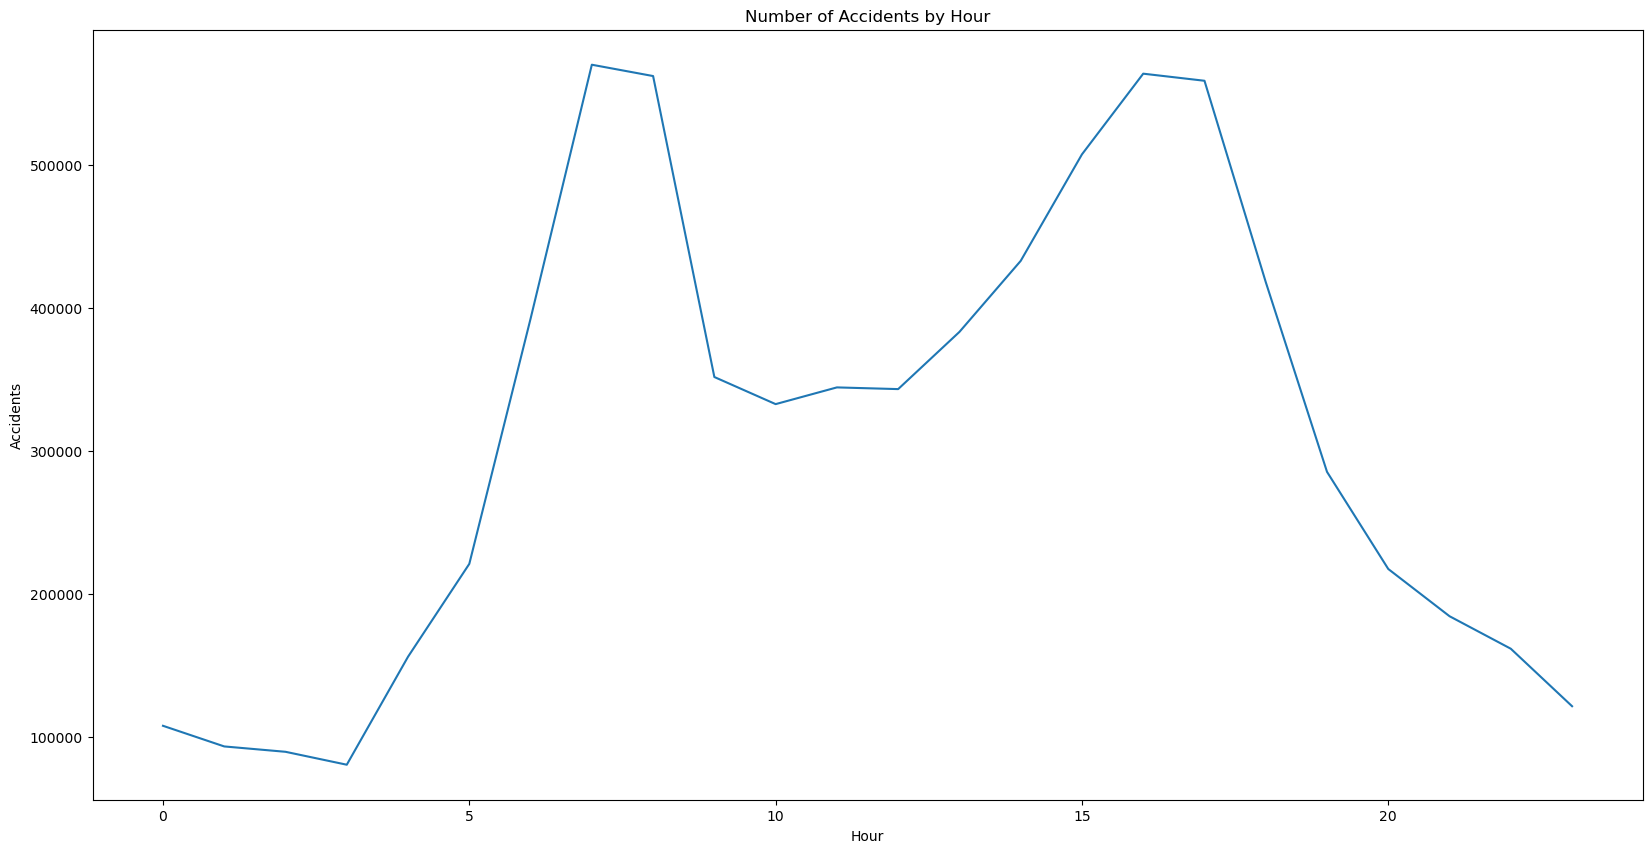

In [22]:
# Convert 'Start_Time' to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the hour
df['Hours'] = df['Start_Time'].dt.hour

# Group by hour and count the number of accidents
df13 = df.groupby(['Hours'])['Hours'].count()

# Plotting the data
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x=df13.index, y=df13.values)
plt.ylabel('Accidents')
plt.xlabel('Hour')
plt.title("Number of Accidents by Hour")
plt.show()